In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df = pd.read_csv("Bengaluru_house_price.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['availability', 'society'], axis='columns')
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Data Cleaning

In [6]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
### since there are plenty samples with us we can directly drop the na values from the dataset

df2 = df1.dropna()
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
df2.shape

(12710, 7)

In [9]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7996\2137667413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [10]:
df2['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [11]:
df2[df2.BHK >= 20]

,area_type,location,size,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [12]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
df2.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
1.25Acres        1
1.26Acres        1
1000           170
1000 - 1285      1
10000            2
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 1976, dtype: int64

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df2[~df2['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [16]:
def convert_sqft_range(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_range('123123- 123123')

123123.0

In [18]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_range)
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [19]:
df3[~df3['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK


In [20]:
df3.isnull().sum()

area_type      0
location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [21]:
df4 = df3.dropna()
df4.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [22]:
df4.shape

(12668, 8)

In [23]:
df4.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [24]:
df4[~df4['price'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK


Then fine with the price column as well

### Feature Engineering 

In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df4['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [26]:
len(df5.location.unique())

1259

In [27]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1248, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1013

In [29]:
location_stats_l_10 = location_stats[location_stats<=10]

In [30]:
location_stats_l_10

location
Nagappa Reddy Layout    10
Thyagaraja Nagar        10
Ganga Nagar             10
Naganathapura           10
Dairy Circle            10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1013, dtype: int64

In [31]:
len(df5.location.unique())

1248

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_l_10 else x)
len(df5.location.unique())

236

In [33]:
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [34]:
df5.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [35]:
df5.tail(60)

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
13255,Super built-up Area,Marathahalli,2 BHK,1146.0,2.0,1.0,69.000,2,6020.942408
13256,Super built-up Area,Kudlu,2 BHK,1041.0,2.0,1.0,53.000,2,5091.258405
13257,Super built-up Area,Whitefield,3 BHK,1453.0,2.0,2.0,58.000,3,3991.741225
13258,Super built-up Area,Whitefield,1 BHK,877.0,1.0,1.0,59.000,1,6727.480046
13259,Super built-up Area,Kanakapura,3 BHK,1477.0,2.0,1.0,69.500,3,4705.484089
13260,Built-up Area,Frazer Town,2 BHK,1420.0,2.0,0.0,120.000,2,8450.704225
13261,Plot Area,other,3 Bedroom,2000.0,2.0,2.0,360.000,3,18000.000000
13262,Built-up Area,other,2 BHK,1140.0,1.0,1.0,185.000,2,16228.070175
13263,Built-up Area,Sarjapur Road,3 BHK,1380.0,2.0,2.0,55.000,3,3985.507246
13264,Super built-up Area,other,2 BHK,1095.0,2.0,1.0,57.000,2,5205.479452


In [36]:
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [37]:
one_hot_encoded = pd.get_dummies(df['area_type'])

# Concatenate the one-hot encoded columns with the original DataFrame

df6 = pd.concat([df5, one_hot_encoded], axis=1)

In [38]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606,0,0,0,1
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615,0,0,1,0
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556,1,0,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861,0,0,0,1
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000,0,0,0,1


In [39]:
df7 = df6.drop(columns=['area_type']) 

In [40]:
df7.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606,0,0,0,1
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615,0,0,1,0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556,1,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861,0,0,0,1
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000,0,0,0,1


### Outlier Removal

In [41]:
df7.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606,0,0,0,1
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615,0,0,1,0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556,1,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861,0,0,0,1
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000,0,0,0,1


In [42]:
### Here we can observe that there is some misleading wrt total_sqft and BHK
df7 = df7.drop(columns=['size']) 

In [43]:
df7.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606,0,0,0,1
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615,0,0,1,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556,1,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861,0,0,0,1
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000,0,0,0,1


In [44]:
df8 = df7[~(df7.total_sqft/df7.BHK < 300)]
df8.shape

(12665, 11)

In [45]:
df9 = df8.drop(columns=['price']) 

In [46]:
df9.head()

,location,total_sqft,bath,balcony,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,1056.0,2.0,1.0,2.0,3699.810606,0,0,0,1
1,Chikka Tirupathi,2600.0,5.0,3.0,4.0,4615.384615,0,0,1,0
2,Uttarahalli,1440.0,2.0,3.0,3.0,4305.555556,1,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,3.0,6245.890861,0,0,0,1
4,Kothanur,1200.0,2.0,1.0,2.0,4250.000000,0,0,0,1


In [47]:
df9.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 179470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df9 = remove_pps_outliers(df9)
df9.shape

(9852, 10)

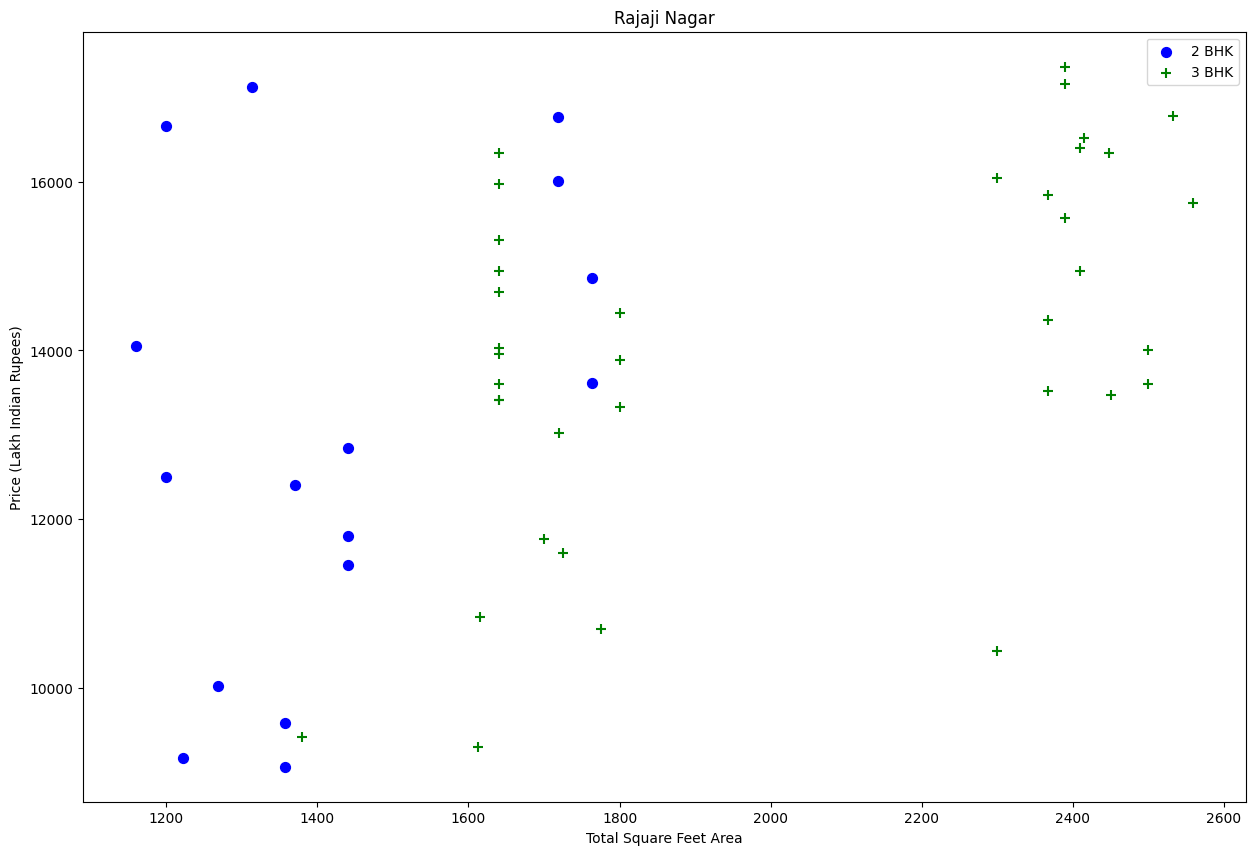

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,"Rajaji Nagar")

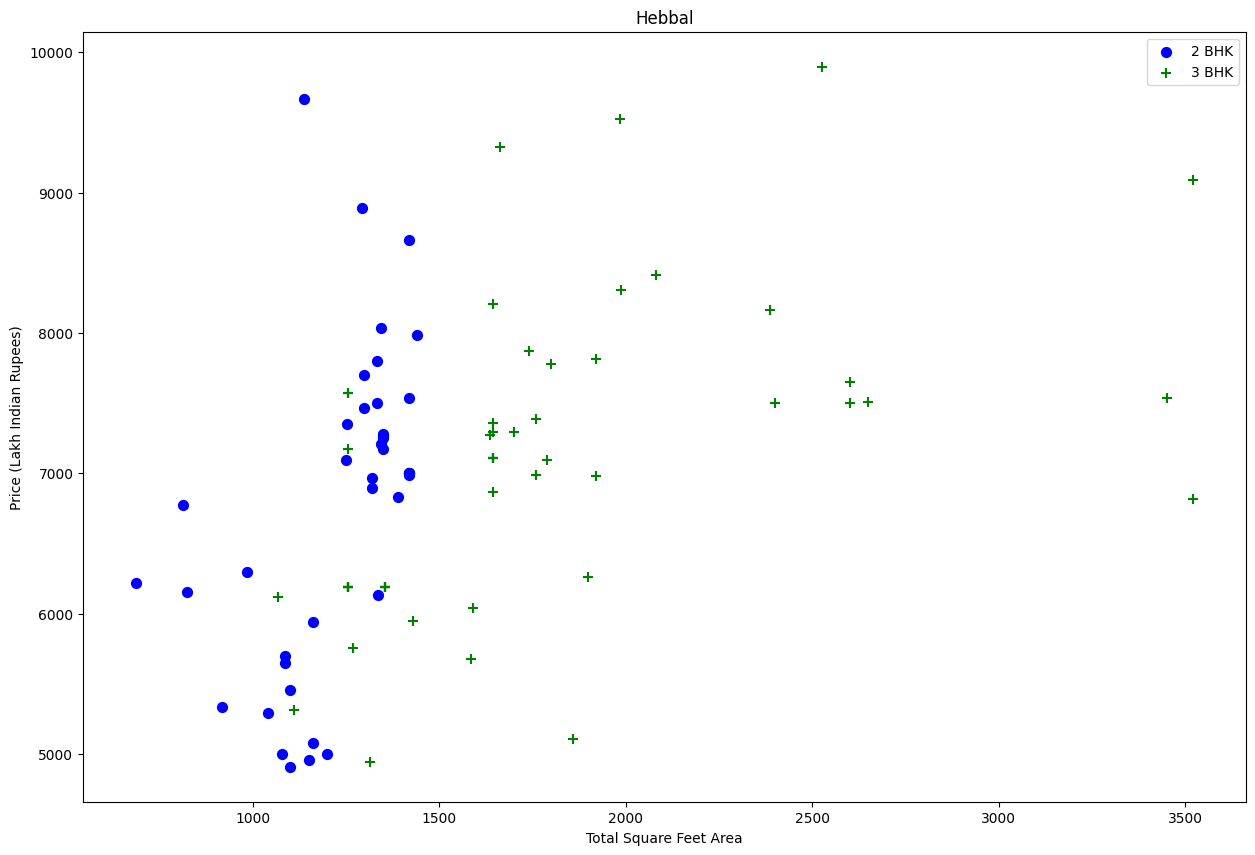

In [52]:
plot_scatter_chart(df9,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df9)
df9.shape

(7014, 10)

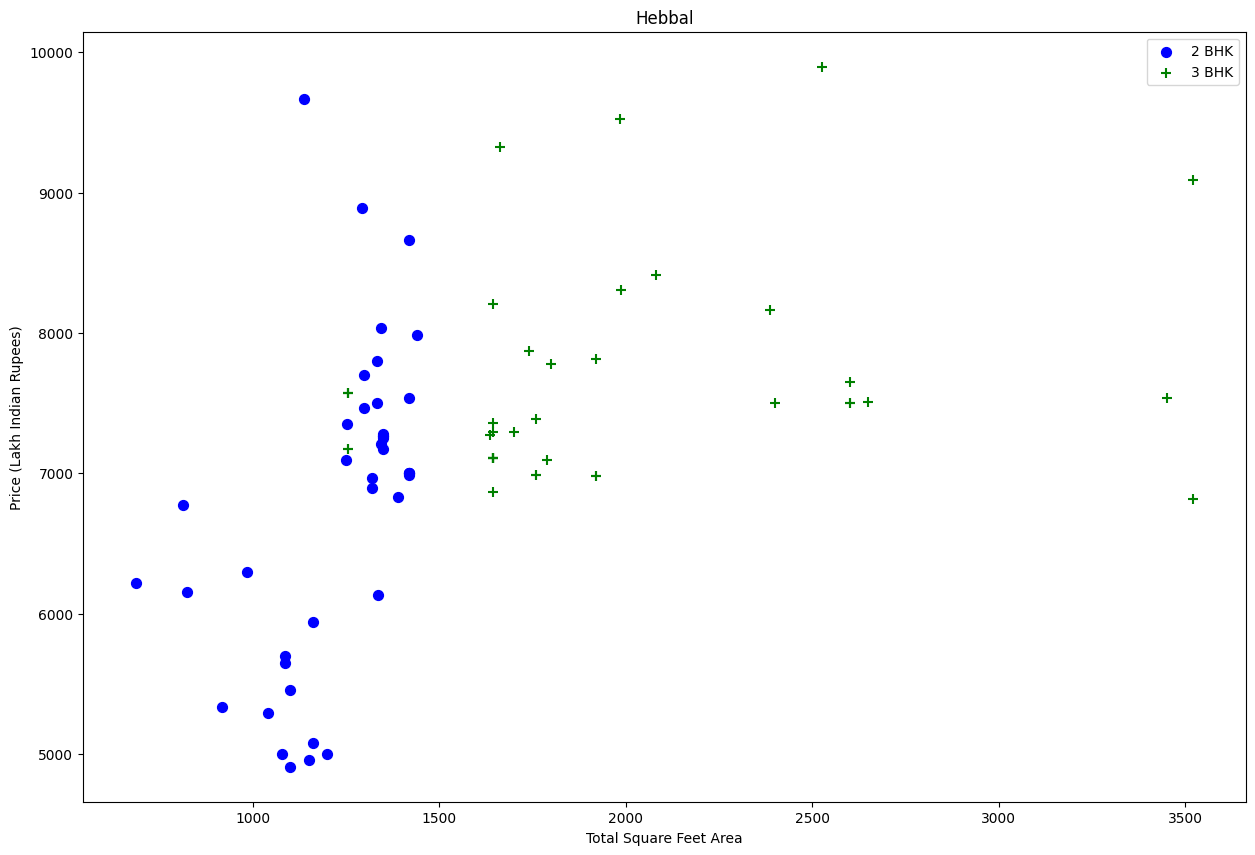

In [57]:
plot_scatter_chart(df9,"Hebbal")

Text(0, 0.5, 'Count')

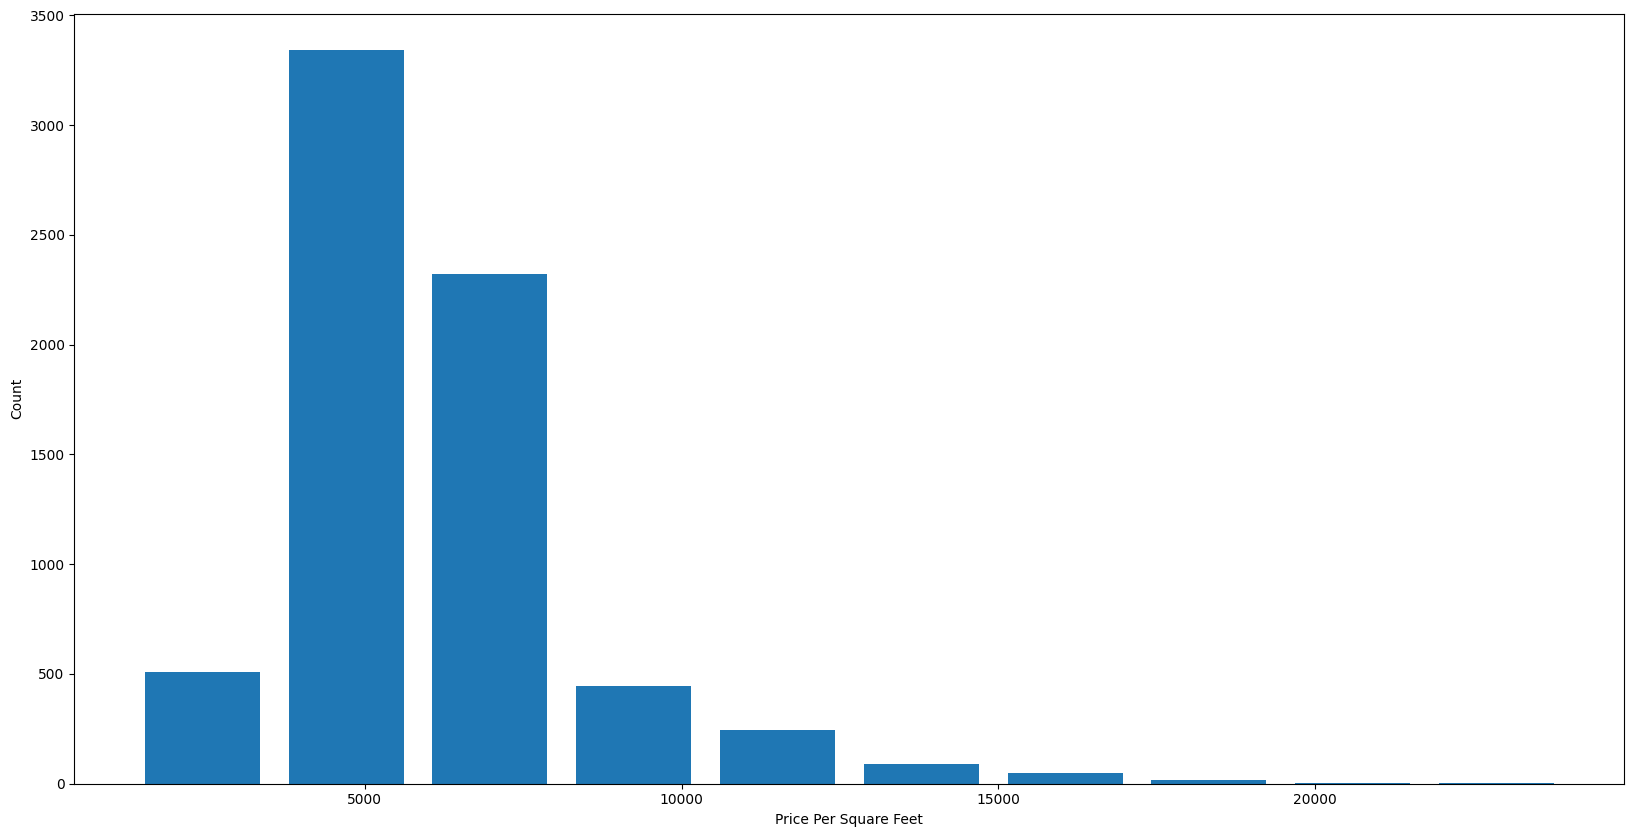

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [59]:
df9.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

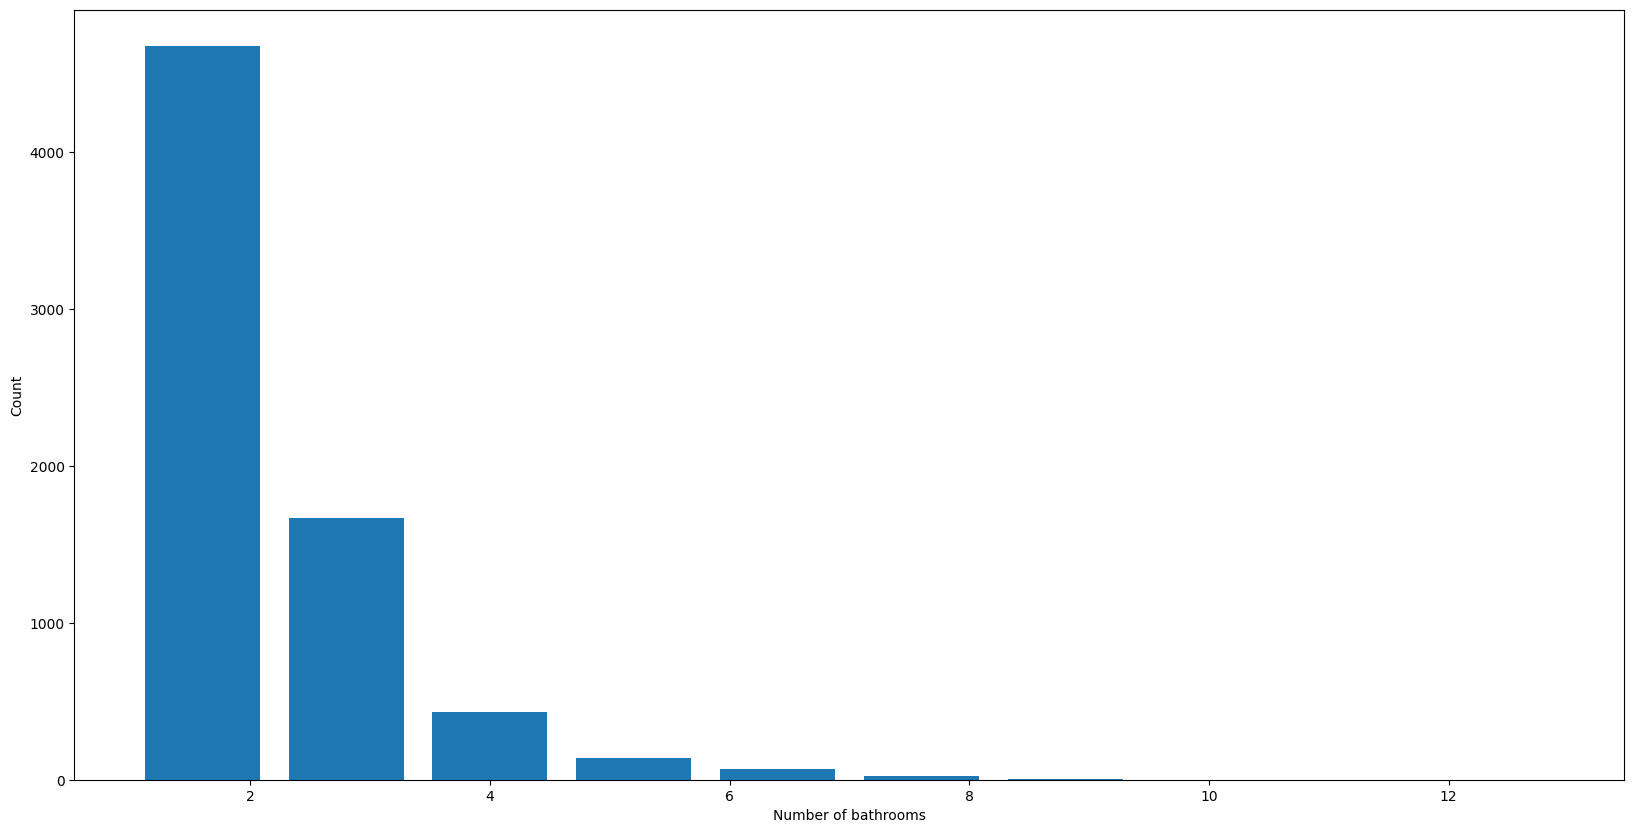

In [60]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [63]:
df9[df9.bath>7]

,location,total_sqft,bath,balcony,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
33,2nd Stage Nagarbhavi,3000.0,8.0,3.0,6.0,15033.333333,0,0,1,0
34,2nd Stage Nagarbhavi,2400.0,8.0,3.0,6.0,18750.000000,0,0,1,0
279,Abbigere,3000.0,8.0,0.0,8.0,5000.000000,1,0,0,0
1219,Bommanahalli,3000.0,8.0,0.0,8.0,4666.666667,1,0,0,0
3081,Horamavu Banaswadi,3800.0,8.0,0.0,6.0,5263.157895,1,0,0,0
3345,Indira Nagar,3250.0,8.0,1.0,8.0,18461.538462,0,0,1,0
3592,KR Puram,4600.0,9.0,2.0,9.0,4347.826087,1,0,0,0
4886,Mico Layout,5000.0,9.0,3.0,9.0,4200.000000,0,0,0,1
5265,R.T. Nagar,3600.0,8.0,2.0,9.0,4583.333333,1,0,0,0
5408,Raja Rajeshwari Nagar,3600.0,9.0,3.0,9.0,6666.666667,1,0,0,0


In [65]:
df9[df9.bath>df9.BHK+2]

,location,total_sqft,bath,balcony,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1542,Chikkabanavar,2460.0,7.0,2.0,4.0,3252.032520,1,0,0,0
6443,Thanisandra,1806.0,6.0,2.0,3.0,6423.034330,0,0,0,1
8082,other,11338.0,9.0,1.0,6.0,8819.897689,0,0,0,1


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [67]:
df9 = df9[df9.bath<df9.BHK+2]
df9.shape

(6947, 10)

In [68]:
df9.head()

,location,total_sqft,bath,balcony,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1st Block Jayanagar,2850.0,4.0,1.0,4.0,15017.543860,0,0,0,1
1,1st Block Jayanagar,1630.0,3.0,2.0,3.0,11901.840491,0,0,0,1
2,1st Block Jayanagar,1875.0,2.0,3.0,3.0,12533.333333,0,0,0,1
3,1st Block Jayanagar,1200.0,2.0,0.0,3.0,10833.333333,1,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,2.0,11983.805668,0,0,0,1


In [69]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df11 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,4.0,15017.543860,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,3.0,11901.840491,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,3.0,12533.333333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,3.0,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,2.0,11983.805668,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,balcony,BHK,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4.0,15017.543860,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3.0,11901.840491,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### Build a Model

In [72]:
df12.shape

(6947, 244)

In [73]:
X = df12.drop(['price_per_sqft'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X.shape

(6947, 243)

In [75]:
y = df12.price_per_sqft
y.head(3)

0    15017.543860
1    11901.840491
2    12533.333333
Name: price_per_sqft, dtype: float64

In [76]:
len(y)

6947

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6655047662316144

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.70114814, 0.68978255, 0.64994586, 0.68953943, 0.69258697])

We can see that in 5 iterations we get a score above 64% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

,model,best_score,best_params
0,linear_regression,0.685395,{'fit_intercept': False}
1,lasso,0.645198,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.353916,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Test the model for few properties

In [82]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [83]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


7972.8353139829405

In [84]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8046.971948182778

In [85]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10766.572008650703

Export the tested model to a pickle file

In [86]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

Export location and column information to a file that will be useful later on in our prediction application

In [87]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))